<a href="https://colab.research.google.com/github/tarsisos/bootcamp_da/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **#3 Retail Project - Predict car price**
Your goal is to help the sales team to predict the price of how much cars in stock will be sold.

**Data description:**
1. **Car_Name**	- Car name
2. **Year**	- Year of manufacture
3. **Selling_Price** - Price that was sold **(TARGET)**
4. **Present_Price**	- List price
5. **Kms_Driven**	- Mileage driven in Km
6. **Fuel_Type**	- Fuel type
7. **Seller_Type**	- Seller type
8. **Transmission**	- Transmission type
9. **Owner** - Quantity of owners

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
#pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading data
car = pd.read_csv('car data.csv')
car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Macro Analysis

In [ ]:
# Information about dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Datatype of each column
car.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [ ]:
# Verifying if existis null data
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# Checking quantity of unique values
car.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [ ]:
# Statistical analysis of numerical data
car.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [ ]:
# Statistical analysis of all dataset
car.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


## EDA

<BarContainer object of 260 artists>

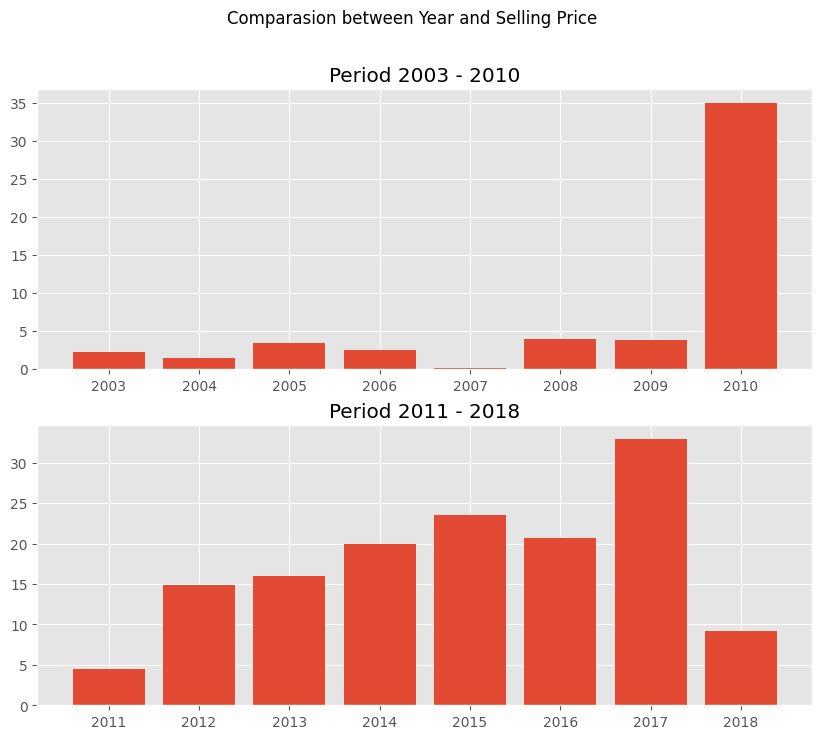

In [ ]:
# Comparing the max selling price between two periods of eight year.
# Two graphs to fit better the data.

fig, ax = plt.subplots(2,1, figsize=(10,8))
plt.suptitle('Comparasion between Year and Selling Price')

ax[0].set_title('Period 2003 - 2010')
first_period = car[car['Year']<= 2010]
ax[0].bar(data = first_period, x = first_period['Year'], height='Selling_Price')

ax[1].set_title('Period 2011 - 2018')
second_period = car[car['Year']> 2010]
ax[1].bar(data = second_period, x = second_period['Year'], height='Selling_Price')

### Analyzing categorical and numerical data

In [ ]:
car.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

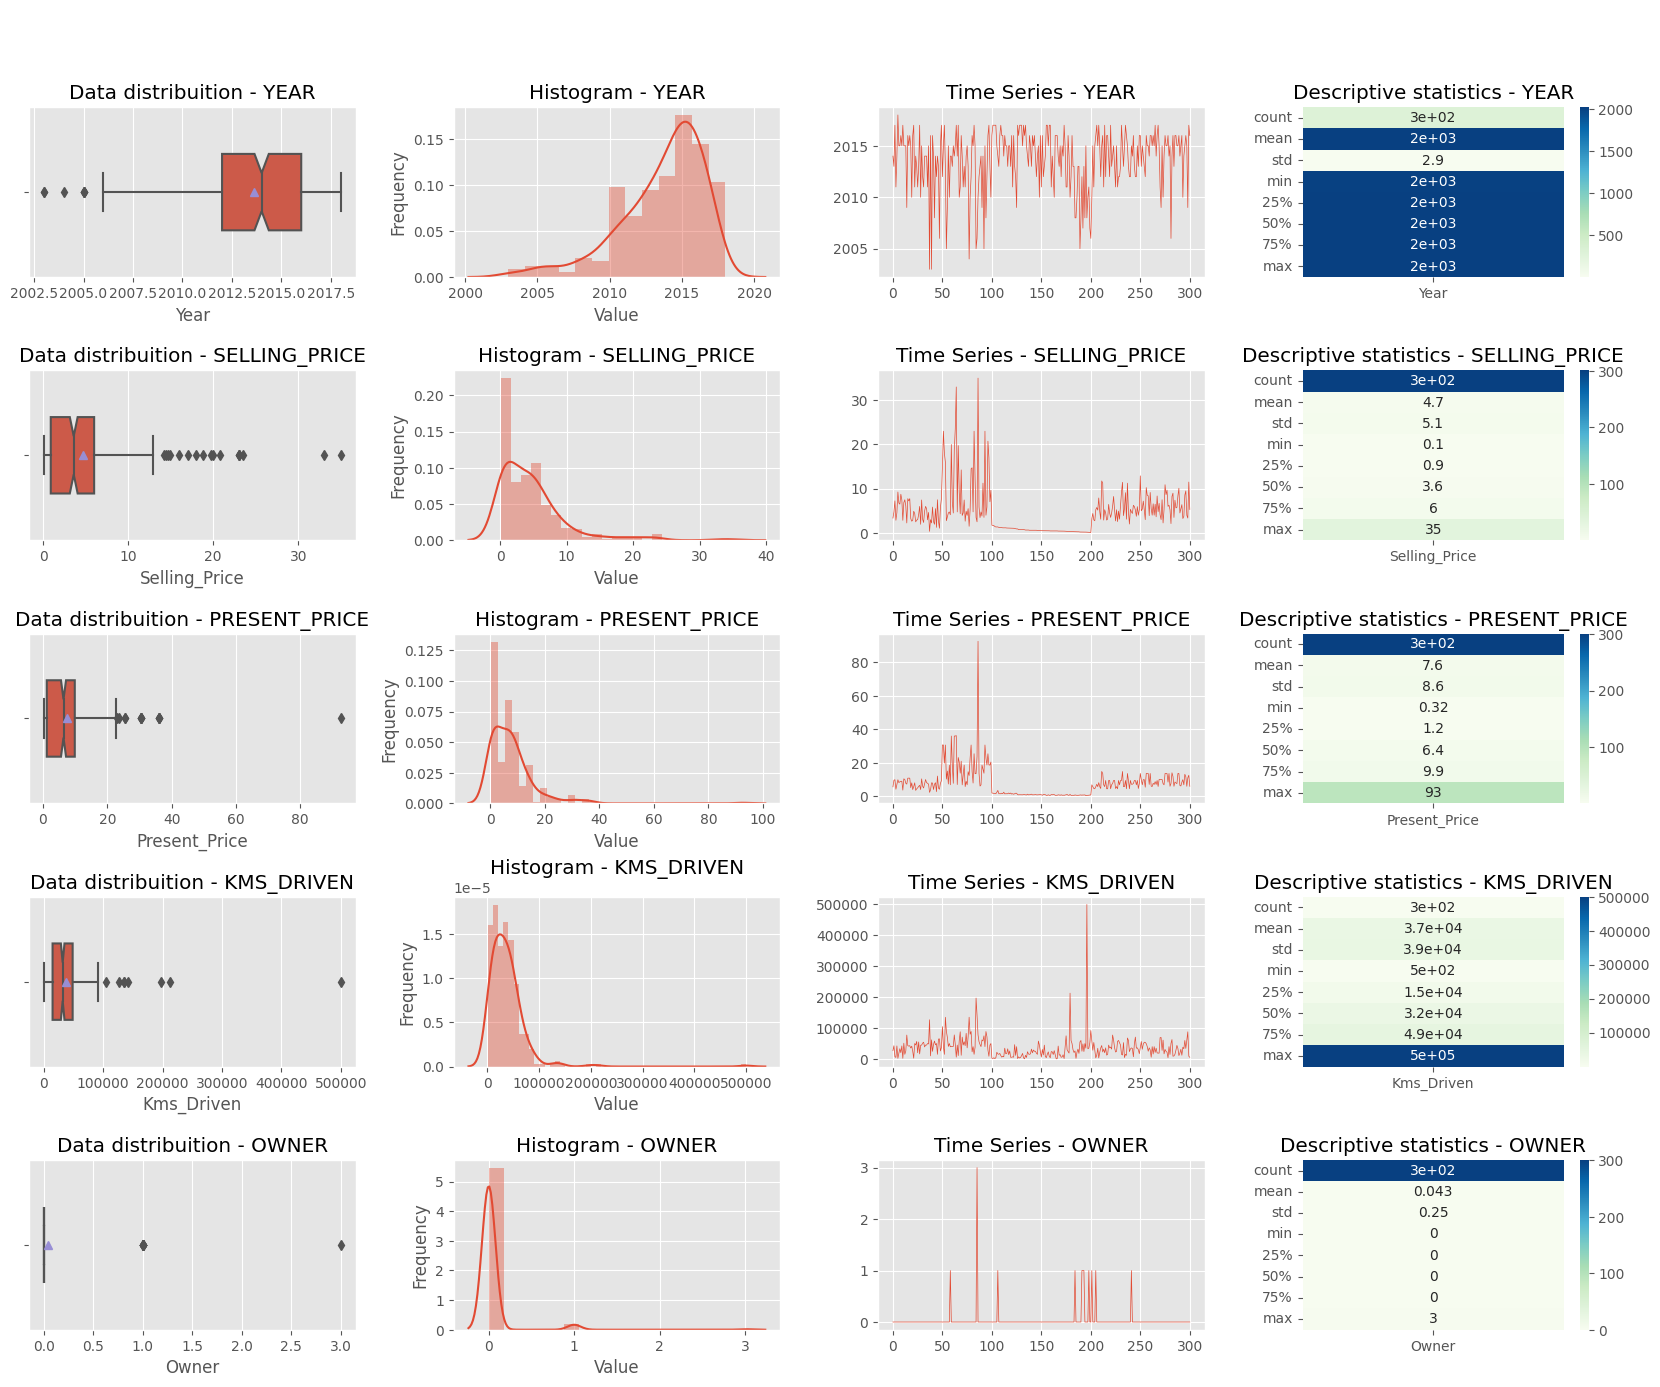

In [ ]:
# Numerical: Year, Selling_Price, Present_Price, Kms_Driven, Owner
Graphs = 5
Cols = 4
Loop = 1

Figure = plt.figure( figsize=(20,15) )

plt.suptitle(
    'Quantitative Analysis',
    fontsize=20,
    color='#ffffff',
    fontweight = 600
)

plt.subplot(Graphs, Cols, 1)

for Index, Column in zip(car.dtypes.index, car.dtypes.values):

  if Column != object:

    plt.subplot(Graphs, Cols, Loop)
    plt.title(f'Data distribuition - {Index.upper()}')
    sns.boxplot(x = car[Index], width=0.45, notch = True, showmeans = True)
    Loop += 1

    plt.subplot(Graphs, Cols, Loop)
    sns.distplot(x=car[Index])
    plt.title(f'Histogram - {Index.upper()}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    Loop += 1

    # Series
    plt.subplot( Graphs, Cols, Loop)
    plt.title(f'Time Series - {Index.upper()}')
    plt.plot( car[Index].values, linewidth = 0.5)
    Loop += 1

    # Statics
    plt.subplot( Graphs, Cols, Loop)
    plt.title(f'Descriptive statistics - {Index.upper()}')
    sns.heatmap( pd.DataFrame( car[Index].describe() ), annot=True, cmap='GnBu')
    Loop += 1

plt.subplots_adjust( left=0.1, bottom=0.1, right=0.9, top=0.915, wspace=0.3, hspace=0.55 )

In [ ]:
# Subplot to analyze 
fig = make_subplots(1,4)

categorical_data = car[['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

for loop, category in enumerate(categorical_data.columns[0:4]):
    fig.append_trace(
      go.Bar(
          x = categorical_data[category].value_counts().index,
          y = categorical_data[category].value_counts().values,
          name = category,
          text= categorical_data[category].value_counts().values,
          textposition='auto'
      ),
      1,loop + 1
  )

fig.update_layout(
    title={
        'text':'Analyzing categorical data',
        'x': 0.5,
        'y': 0.95
    }
  )
fig.show()

In [ ]:
fig = make_subplots(1,4)

categorical_data = car[['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

test = car[['Fuel_Type', 'Seller_Type']]

for loop, category in enumerate(categorical_data.columns):
  fig.append_trace(
      go.Box(
          x=categorical_data[category],
          y=car['Present_Price'],
          notched = True,
          name = category
      ),
      1,loop+1
  )

fig.update_layout(
    title={
        'text':'Analyzing categorical data by Present Price',
        'x': 0.5,
        'y': 0.95
    }
  )
fig.show()

## Data Preparation

In [ ]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Labeling categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Fuel_Type	Seller_Type	Transmission

le_Fuel_Type = LabelEncoder()
le_Seller_Type = LabelEncoder()
le_Transmission = LabelEncoder()

# Fit labels
le_Fuel_Type.fit( car.Fuel_Type.drop_duplicates() )
le_Seller_Type.fit( car.Seller_Type.drop_duplicates() )
le_Transmission.fit( car.Transmission.drop_duplicates() )

# Transform
car.Fuel_Type = le_Fuel_Type.transform( car.Fuel_Type )
car.Seller_Type = le_Seller_Type.transform( car.Seller_Type )
car.Transmission = le_Transmission.transform( car.Transmission )

In [ ]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
le_Fuel_Type.classes_,le_Seller_Type.classes_,le_Transmission.classes_

(array(['CNG', 'Diesel', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object))

### Correlation

In [ ]:
car.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


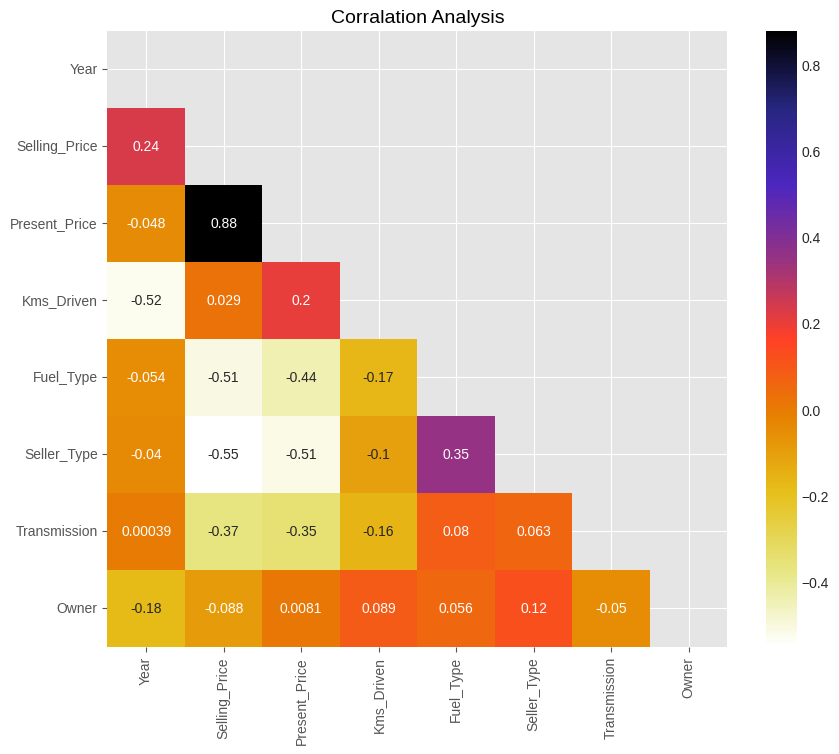

In [ ]:
# Plot correlation graph
fig, ax = plt.subplots(figsize=(10,8))

# Calculate correlation
Car_Correlation = car.corr()

plt.style.use('default')
plt.style.use('seaborn-dark')

# Mask to hide upper triangle correlation
mask = np.zeros_like(Car_Correlation)
mask [ np.triu_indices_from(mask) ] = True

# Setting title
plt.title('Corralation Analysis', fontsize=14)


# Plot
sns.heatmap(
    Car_Correlation,
    mask = mask,
    cmap = 'CMRmap_r',
    annot=True
);

## Model Construction

In [ ]:
# Split data in axis X and Y
Axis_x = car.drop(columns=['Car_Name', 'Selling_Price'])
Axis_y = car['Selling_Price']

In [ ]:
Axis_x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [ ]:
Axis_y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
# Data split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    Axis_x, Axis_y,
    test_size = 0.2,
    random_state = 0
)

len(x_train), len(x_test)

(240, 61)

In [ ]:
from sklearn.linear_model import LinearRegression

# Train predective model
Linear_Model = LinearRegression()
Linear_Model.fit( x_train, y_train)

# Characteristics variables
Linear_Model.feature_names_in_

array(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'], dtype=object)

In [ ]:
# Predictions to test the model
Predictions = Linear_Model.predict( x_test )

In [ ]:
Predictions[0:5]

array([ 7.15109403, -0.4235976 ,  4.29317385,  8.65452674, 14.15677754])

In [ ]:
y_test[0:5].values

array([ 8.25,  0.5 ,  5.25,  9.5 , 18.  ])

In [ ]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

#### Evaluation Metrics

In [ ]:
# Evaluate all metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

R2 = Linear_Model.score( x_test, y_test )
MAE = mean_absolute_error( y_test, Predictions)
MSE = mean_squared_error( y_test, Predictions)
RMSE = mean_squared_error( y_test, Predictions, squared=False)
MAPE = mean_absolute_percentage_error( y_test, Predictions) * 100

Dicionario = {
    'R²': round(R2, 4),
    'MAE': round(MAE, 4),
    'MSE': round(MSE, 4),
    'RMSE': round(RMSE, 4),
    'MAPE': round(MAPE, 4),
}

pd.DataFrame( Dicionario, index=[0] ).transpose().rename(columns = {0:'Metrics Value' })

,Metrics Value
R²,0.9134
MAE,1.0000
MSE,2.1886
RMSE,1.4794
MAPE,76.6862


In [ ]:
# Cross-validation
from sklearn.model_selection import cross_val_score

model = LinearRegression()

Scores = cross_val_score(model, Axis_x, Axis_y, cv=5, scoring='r2')

print(f'| Evaluating Cross-validation |')
print('--'*25)

print(f'Each part will be tested with: {len(car) / 5} registros')
print('--'*25)

print(f'R² in each fold: ', Scores)
print('--'*25)

print(f'Final mean: { round( np.mean( Scores ), 2) } ')

| Evaluating Cross-validation |
--------------------------------------------------
Each part will be tested with: 60.2 registros
--------------------------------------------------
R² in each fold:  [  0.83482494   0.77512003 -94.61105213   0.61088628   0.83892197]
--------------------------------------------------
Final mean: -18.31 


### Test model

In [ ]:
car.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0


In [ ]:
Experiment = [[2014, 5.59, 27000, 2, 0, 1, 0]]
Linear_Model.predict( Experiment )

array([3.83981246])

In [ ]:
Experiment = [[2014, 3.35, 27000, 2, 0, 1, 0]]
Linear_Model.predict( Experiment )

array([2.8617837])